In [37]:
import pandas as pd
import os


In [38]:
# CSV file 
csv_path = r"C:\Users\ajith\OneDrive\Desktop\Dissertation\cleaned_labels.csv"

df = pd.read_csv(csv_path)

print("Loaded CSV with rows:", len(df))
df.head()


Loaded CSV with rows: 84


,filename,label
0,IMG_20220411_106246.jpg,1
1,IMG_20220411_106256.jpg,0
2,IMG_20220411_106258.jpg,0
3,IMG_20220411_09235385.jpg,0
4,IMG_20220411_09235389.jpg,0


In [39]:

image_dir = r"C:\Users\ajith\OneDrive\Desktop\Dissertation\dataset\content\dataset"


df['exists'] = df['filename'].apply(lambda x: os.path.exists(os.path.join(image_dir, x)))


print("Matched image files:", df['exists'].sum(), "/", len(df))


df = df[df['exists']].copy()
df = df[['filename', 'label']]
df.head()


Matched image files: 84 / 84


,filename,label
0,IMG_20220411_106246.jpg,1
1,IMG_20220411_106256.jpg,0
2,IMG_20220411_106258.jpg,0
3,IMG_20220411_09235385.jpg,0
4,IMG_20220411_09235389.jpg,0


In [40]:
final_csv_path = r"C:\Users\ajith\OneDrive\Desktop\Dissertation\final_verified_labels.csv"
df.to_csv(final_csv_path, index=False)
print("Final verified labels saved at:", final_csv_path)


Final verified labels saved at: C:\Users\ajith\OneDrive\Desktop\Dissertation\final_verified_labels.csv


In [41]:
print(f" TASK 1 COMPLETE: {len(df)} image-label pairs are verified and ready.")
df.sample(5)


 TASK 1 COMPLETE: 84 image-label pairs are verified and ready.


,filename,label
47,IMG_20220506_09238574.jpg,1
71,IMG_20220616_09246715.jpg,0
26,IMG_20220421_09236558.jpg,0
83,IMG_20220701_09249157.jpg,0
1,IMG_20220411_106256.jpg,0


In [42]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [43]:
import pandas as pd

csv_path = r"C:\Users\ajith\OneDrive\Desktop\Dissertation\final_verified_labels.csv"
image_dir = r"C:\Users\ajith\OneDrive\Desktop\Dissertation\dataset\content\dataset"

df = pd.read_csv(csv_path)

print(f"Total samples: {len(df)}")
df.head()


Total samples: 84


,filename,label
0,IMG_20220411_106246.jpg,1
1,IMG_20220411_106256.jpg,0
2,IMG_20220411_106258.jpg,0
3,IMG_20220411_09235385.jpg,0
4,IMG_20220411_09235389.jpg,0


In [44]:
import pandas as pd

csv_path = r"C:\Users\ajith\OneDrive\Desktop\Dissertation\cleaned_labels.csv"
df = pd.read_csv(csv_path)

print(df.head())                    # View top rows
print(df['label'].unique())         # Check unique label values
print(df['label'].value_counts())   # Count how many of each class


                    filename label
0    IMG_20220411_106246.jpg     1
1    IMG_20220411_106256.jpg     0
2    IMG_20220411_106258.jpg     0
3  IMG_20220411_09235385.jpg     0
4  IMG_20220411_09235389.jpg     0
['1' '0' 'result not found']
label
0                   66
1                   16
result not found     2
Name: count, dtype: int64


In [45]:
import os
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, save_img

# Input paths
csv_path = r"C:\Users\ajith\OneDrive\Desktop\Dissertation\cleaned_labels.csv"
image_dir = r"C:\Users\ajith\OneDrive\Desktop\Dissertation\dataset\content\dataset"
output_dir = os.path.join(image_dir, "augmented")
os.makedirs(output_dir, exist_ok=True)

# Load CSV and keep only COVID-positive rows
df = pd.read_csv(csv_path)
df = df[df['label'].isin(['0', '1'])]     # Remove bad rows like 'result not found'
positive_df = df[df['label'] == '1']      # Correct way to select COVID-positive rows

print(f" Found {len(positive_df)} COVID-positive images to augment.")

# Image augmentor
augmentor = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Settings
AUG_PER_IMAGE = 5
augmented_entries = []

# Process positive images only
for _, row in positive_df.iterrows():
    img_path = os.path.join(image_dir, row['filename'])
    base_name = os.path.splitext(os.path.basename(row['filename']))[0]

    if not os.path.exists(img_path):
        print(f" File not found: {img_path}")
        continue

    try:
        img = load_img(img_path)
        x = img_to_array(img).reshape((1,) + img.size + (3,))  # Ensure shape is (1, height, width, 3)

        for i, batch in enumerate(augmentor.flow(x, batch_size=1)):
            aug_filename = f"{base_name}_aug_{i}.jpg"
            aug_path = os.path.join(output_dir, aug_filename)
            save_img(aug_path, batch[0])

            # Store label 1 for each augmented file
            augmented_entries.append({'filename': os.path.join('augmented', aug_filename), 'label': 1})
            print(f"Saved augmented image: {aug_filename}")

            if i + 1 >= AUG_PER_IMAGE:
                break

    except Exception as e:
        print(f"⚠️ Error processing {img_path}: {e}")

# Save new CSV with only augmented entries
augmented_df = pd.DataFrame(augmented_entries)
output_csv = r"C:\Users\ajith\OneDrive\Desktop\Dissertation\cleaned_labels_augmented.csv"
augmented_df.to_csv(output_csv, index=False)
print(f" Saved new CSV with only augmented positives: {output_csv}")


 Found 16 COVID-positive images to augment.
Saved augmented image: IMG_20220411_106246_aug_0.jpg
Saved augmented image: IMG_20220411_106246_aug_1.jpg
Saved augmented image: IMG_20220411_106246_aug_2.jpg
Saved augmented image: IMG_20220411_106246_aug_3.jpg
Saved augmented image: IMG_20220411_106246_aug_4.jpg
Saved augmented image: IMG_20220413_09235579_aug_0.jpg
Saved augmented image: IMG_20220413_09235579_aug_1.jpg
Saved augmented image: IMG_20220413_09235579_aug_2.jpg
Saved augmented image: IMG_20220413_09235579_aug_3.jpg
Saved augmented image: IMG_20220413_09235579_aug_4.jpg
Saved augmented image: IMG_20220413_09235624_aug_0.jpg
Saved augmented image: IMG_20220413_09235624_aug_1.jpg
Saved augmented image: IMG_20220413_09235624_aug_2.jpg
Saved augmented image: IMG_20220413_09235624_aug_3.jpg
Saved augmented image: IMG_20220413_09235624_aug_4.jpg
Saved augmented image: IMG_20220413_09235641_aug_0.jpg
Saved augmented image: IMG_20220413_09235641_aug_1.jpg
Saved augmented image: IMG_2022

In [46]:
import pandas as pd

# Load original and augmented CSVs
original_df = pd.read_csv("C:/Users/ajith/OneDrive/Desktop/Dissertation/cleaned_labels.csv")
augmented_df = pd.read_csv("C:/Users/ajith/OneDrive/Desktop/Dissertation/cleaned_labels_augmented.csv")

# Merge both dataframes
merged_df = pd.concat([original_df, augmented_df], ignore_index=True)

# Convert labels to string for safe filtering
merged_df['label'] = merged_df['label'].astype(str)

# Keep only valid labels '0' and '1'
merged_df = merged_df[merged_df['label'].isin(['0', '1'])]

# Convert back to integers
merged_df['label'] = merged_df['label'].astype(int)

# Shuffle the merged dataframe
merged_df = merged_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Save to disk
merged_df.to_csv("C:/Users/ajith/OneDrive/Desktop/Dissertation/merged_labels.csv", index=False)

# Print final label distribution
print("Final label distribution:")
print(merged_df['label'].value_counts())


Final label distribution:
label
1    96
0    66
Name: count, dtype: int64


EfficientNetV2 Implementation

In [47]:


import pandas as pd
import os
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load the cleaned merged CSV
csv_path = r"C:/Users/ajith/OneDrive/Desktop/Dissertation/merged_labels.csv"
df = pd.read_csv(csv_path)

# Confirm label balance
print("Label distribution:")
print(df['label'].value_counts())

# Define base directory for images
image_dir = r"C:/Users/ajith/OneDrive/Desktop/Dissertation/dataset/content/dataset"

# Add full path to filenames for Keras generator
df['filepath'] = df['filename'].apply(lambda x: os.path.join(image_dir, x.replace('\\', '/')))



Label distribution:
label
1    96
0    66
Name: count, dtype: int64


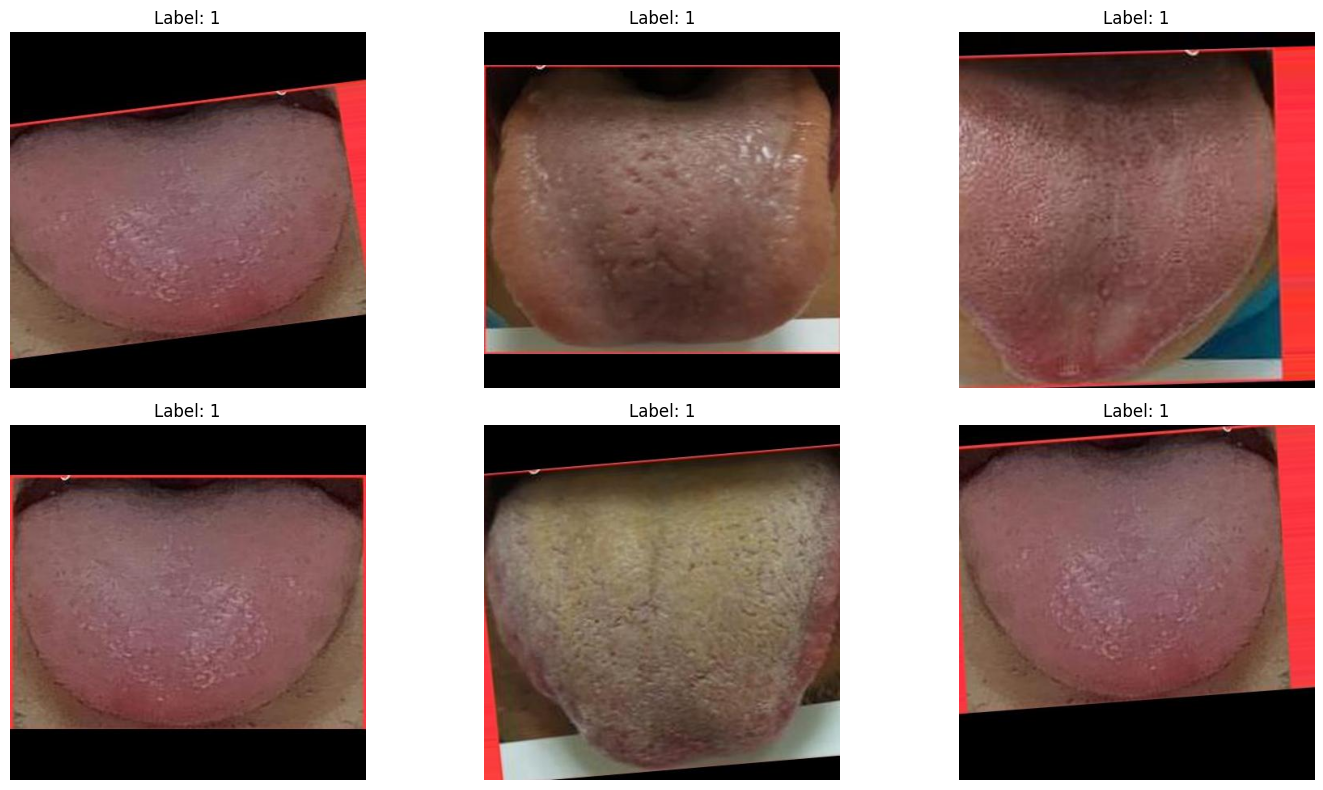

In [48]:
# Show a few sample images with their labels
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

sample_df = df.sample(6, random_state=42).reset_index(drop=True)

plt.figure(figsize=(15, 8))
for i in range(len(sample_df)):
    img = mpimg.imread(sample_df['filepath'][i])
    plt.subplot(2, 3, i + 1)
    plt.imshow(img)
    plt.title(f"Label: {sample_df['label'][i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [49]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, confusion_matrix, matthews_corrcoef, ConfusionMatrixDisplay)
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetV2B0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [50]:
df = pd.read_csv("merged_labels.csv")
df['filepath'] = df['filename'].apply(
    lambda x: os.path.join(
        r"C:\Users\ajith\OneDrive\Desktop\Dissertation\dataset\content\dataset\augmented"
        if x.startswith("augmented") else
        r"C:\Users\ajith\OneDrive\Desktop\Dissertation\dataset\content\dataset",
        x.split('\\')[-1]
    )
)

df = df[df['filepath'].apply(os.path.exists)].reset_index(drop=True)
df['label'] = df['label'].astype(int).astype(str)

# Use full set or subset for evaluation
test_df = df.copy()
print("Evaluation dataset size:", len(test_df))

Evaluation dataset size: 162


In [51]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_gen = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='filepath',
    y_col='label',
    target_size=(224, 224),
    batch_size=16,
    class_mode='binary',
    shuffle=False
)

y_true = test_df['label'].astype(int).values


Found 162 validated image filenames belonging to 2 classes.


In [52]:
def evaluate_model(y_true, y_pred, y_prob):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    auc = roc_auc_score(y_true, y_prob)
    mcc = matthews_corrcoef(y_true, y_pred)
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0

    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall (Sensitivity): {sensitivity:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC: {auc:.4f}")
    print(f"MCC: {mcc:.4f}")

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
    disp.plot(cmap='Blues')
    plt.title("Ensemble Confusion Matrix")
    plt.show()



 Fold 1
Train class distribution after oversampling:
label
1    228
0     53
Name: count, dtype: int64
Validation class distribution:
label
1    20
0    13
Name: count, dtype: int64
Found 281 validated image filenames belonging to 2 classes.


Found 33 validated image filenames belonging to 2 classes.
Epoch 1/20
18/18 [==============================] - ETA: 0s - loss: 0.0671 - accuracy: 0.4520

c:\Users\ajith\miniconda3\envs\tongue_cnn\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


18/18 [==============================] - 19s 518ms/step - loss: 0.0671 - accuracy: 0.4520 - val_loss: 0.1078 - val_accuracy: 0.6061
Epoch 2/20
18/18 [==============================] - 8s 443ms/step - loss: 0.0607 - accuracy: 0.4947 - val_loss: 0.0769 - val_accuracy: 0.3939
Epoch 3/20
18/18 [==============================] - 7s 400ms/step - loss: 0.0469 - accuracy: 0.5765 - val_loss: 0.0795 - val_accuracy: 0.4242
Epoch 4/20
18/18 [==============================] - 8s 435ms/step - loss: 0.0460 - accuracy: 0.6121 - val_loss: 0.0644 - val_accuracy: 0.5152
Epoch 5/20
18/18 [==============================] - 8s 438ms/step - loss: 0.0387 - accuracy: 0.6655 - val_loss: 0.0506 - val_accuracy: 0.7273
Epoch 6/20
18/18 [==============================] - 7s 385ms/step - loss: 0.0318 - accuracy: 0.7509 - val_loss: 0.0756 - val_accuracy: 0.3939
Epoch 7/20
18/18 [==============================] - 7s 392ms/step - loss: 0.0301 - accuracy: 0.7687 - val_loss: 0.0927 - val_accuracy: 0.4242
Epoch 8/20
18/18

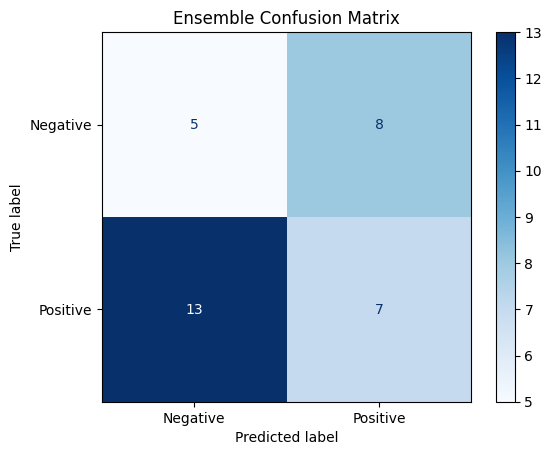


 Fold 2
Train class distribution after oversampling:
label
1    231
0     52
Name: count, dtype: int64
Validation class distribution:
label
1    19
0    14
Name: count, dtype: int64
Found 283 validated image filenames belonging to 2 classes.
Found 33 validated image filenames belonging to 2 classes.
Epoch 1/20
18/18 [==============================] - ETA: 0s - loss: 0.0767 - accuracy: 0.6007

c:\Users\ajith\miniconda3\envs\tongue_cnn\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


18/18 [==============================] - 19s 473ms/step - loss: 0.0767 - accuracy: 0.6007 - val_loss: 0.0733 - val_accuracy: 0.4242
Epoch 2/20
18/18 [==============================] - 7s 373ms/step - loss: 0.0584 - accuracy: 0.4947 - val_loss: 0.0759 - val_accuracy: 0.4242
Epoch 3/20
18/18 [==============================] - 7s 412ms/step - loss: 0.0536 - accuracy: 0.5159 - val_loss: 0.0714 - val_accuracy: 0.4848
Epoch 4/20
18/18 [==============================] - 8s 412ms/step - loss: 0.0443 - accuracy: 0.6113 - val_loss: 0.0668 - val_accuracy: 0.5455
Epoch 5/20
18/18 [==============================] - 8s 427ms/step - loss: 0.0397 - accuracy: 0.6396 - val_loss: 0.0633 - val_accuracy: 0.5455
Epoch 6/20
18/18 [==============================] - 7s 407ms/step - loss: 0.0384 - accuracy: 0.6961 - val_loss: 0.0566 - val_accuracy: 0.6667
Epoch 7/20
18/18 [==============================] - 7s 376ms/step - loss: 0.0330 - accuracy: 0.6855 - val_loss: 0.0672 - val_accuracy: 0.4242
Epoch 8/20
18/18

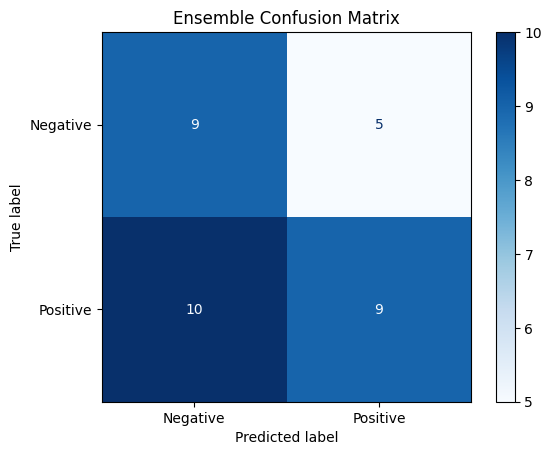


 Fold 3
Train class distribution after oversampling:
label
1    231
0     53
Name: count, dtype: int64
Validation class distribution:
label
1    19
0    13
Name: count, dtype: int64
Found 284 validated image filenames belonging to 2 classes.
Found 32 validated image filenames belonging to 2 classes.
Epoch 1/20
18/18 [==============================] - ETA: 0s - loss: 0.0892 - accuracy: 0.4155

c:\Users\ajith\miniconda3\envs\tongue_cnn\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


18/18 [==============================] - 18s 475ms/step - loss: 0.0892 - accuracy: 0.4155 - val_loss: 0.0827 - val_accuracy: 0.5938
Epoch 2/20
18/18 [==============================] - 7s 408ms/step - loss: 0.0610 - accuracy: 0.4190 - val_loss: 0.0770 - val_accuracy: 0.4375
Epoch 3/20
18/18 [==============================] - 7s 409ms/step - loss: 0.0508 - accuracy: 0.4507 - val_loss: 0.0732 - val_accuracy: 0.4062
Epoch 4/20
18/18 [==============================] - 7s 374ms/step - loss: 0.0464 - accuracy: 0.5775 - val_loss: 0.0754 - val_accuracy: 0.3750
Epoch 5/20
18/18 [==============================] - 7s 414ms/step - loss: 0.0384 - accuracy: 0.6338 - val_loss: 0.0629 - val_accuracy: 0.5625
Epoch 6/20
18/18 [==============================] - 7s 404ms/step - loss: 0.0350 - accuracy: 0.7148 - val_loss: 0.0488 - val_accuracy: 0.7500
Epoch 7/20
18/18 [==============================] - 7s 372ms/step - loss: 0.0329 - accuracy: 0.7289 - val_loss: 0.0683 - val_accuracy: 0.3750
Epoch 8/20
18/18

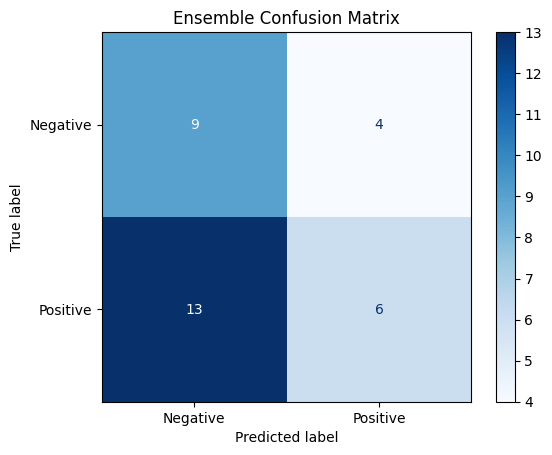


 Fold 4
Train class distribution after oversampling:
label
1    231
0     53
Name: count, dtype: int64
Validation class distribution:
label
1    19
0    13
Name: count, dtype: int64
Found 284 validated image filenames belonging to 2 classes.
Found 32 validated image filenames belonging to 2 classes.
Epoch 1/20
18/18 [==============================] - ETA: 0s - loss: 0.0822 - accuracy: 0.4718

c:\Users\ajith\miniconda3\envs\tongue_cnn\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


18/18 [==============================] - 19s 498ms/step - loss: 0.0822 - accuracy: 0.4718 - val_loss: 0.0722 - val_accuracy: 0.4062
Epoch 2/20
18/18 [==============================] - 7s 397ms/step - loss: 0.0643 - accuracy: 0.4437 - val_loss: 0.0819 - val_accuracy: 0.4062
Epoch 3/20
18/18 [==============================] - 7s 389ms/step - loss: 0.0543 - accuracy: 0.4894 - val_loss: 0.0780 - val_accuracy: 0.4062
Epoch 4/20
18/18 [==============================] - 8s 473ms/step - loss: 0.0457 - accuracy: 0.6162 - val_loss: 0.0687 - val_accuracy: 0.4375
Epoch 5/20
18/18 [==============================] - 8s 431ms/step - loss: 0.0469 - accuracy: 0.6021 - val_loss: 0.0836 - val_accuracy: 0.4062
Epoch 6/20
18/18 [==============================] - 8s 414ms/step - loss: 0.0325 - accuracy: 0.6831 - val_loss: 0.0747 - val_accuracy: 0.5938
Epoch 7/20
18/18 [==============================] - 8s 419ms/step - loss: 0.0311 - accuracy: 0.7641 - val_loss: 0.0690 - val_accuracy: 0.5625
Epoch 8/20
18/18

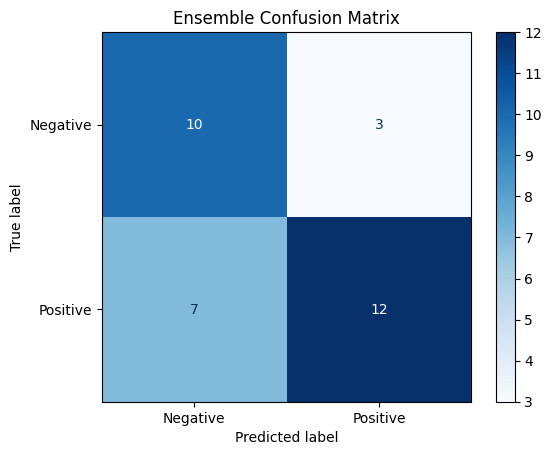


 Fold 5
Train class distribution after oversampling:
label
1    231
0     53
Name: count, dtype: int64
Validation class distribution:
label
1    19
0    13
Name: count, dtype: int64
Found 284 validated image filenames belonging to 2 classes.
Found 32 validated image filenames belonging to 2 classes.
Epoch 1/20
18/18 [==============================] - ETA: 0s - loss: 0.0711 - accuracy: 0.5317

c:\Users\ajith\miniconda3\envs\tongue_cnn\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


18/18 [==============================] - 19s 515ms/step - loss: 0.0711 - accuracy: 0.5317 - val_loss: 0.0876 - val_accuracy: 0.5938
Epoch 2/20
18/18 [==============================] - 8s 434ms/step - loss: 0.0561 - accuracy: 0.5423 - val_loss: 0.0744 - val_accuracy: 0.4062
Epoch 3/20
18/18 [==============================] - 8s 430ms/step - loss: 0.0479 - accuracy: 0.5141 - val_loss: 0.0620 - val_accuracy: 0.4375
Epoch 4/20
18/18 [==============================] - 7s 390ms/step - loss: 0.0414 - accuracy: 0.6197 - val_loss: 0.0773 - val_accuracy: 0.4062
Epoch 5/20
18/18 [==============================] - 8s 416ms/step - loss: 0.0372 - accuracy: 0.6761 - val_loss: 0.0598 - val_accuracy: 0.5625
Epoch 6/20
18/18 [==============================] - 7s 376ms/step - loss: 0.0333 - accuracy: 0.7359 - val_loss: 0.0764 - val_accuracy: 0.4375
Epoch 7/20
18/18 [==============================] - 7s 415ms/step - loss: 0.0272 - accuracy: 0.7606 - val_loss: 0.0517 - val_accuracy: 0.5625
Epoch 8/20
18/18

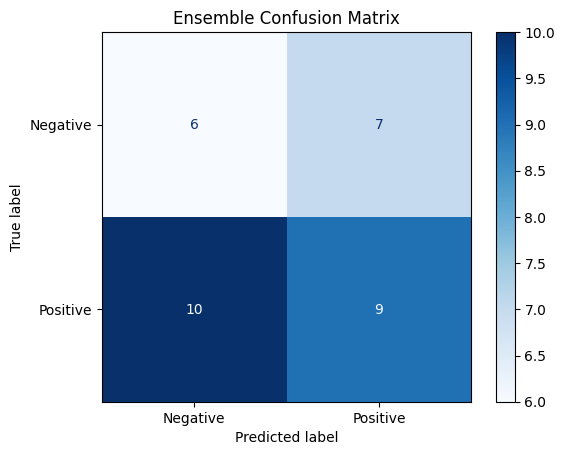

In [55]:
df['label'] = df['label'].astype(int)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
os.makedirs("efficientnet_models", exist_ok=True)

for fold, (train_idx, val_idx) in enumerate(skf.split(df['filepath'], df['label'])):
    print(f"\n Fold {fold + 1}")

    train_df = df.iloc[train_idx].copy()
    val_df = df.iloc[val_idx].copy()

    # Positive class oversampling
    pos_df = train_df[train_df['label'] == 1]
    neg_df = train_df[train_df['label'] == 0]
    pos_df_oversampled = pd.concat([pos_df] * 3, ignore_index=True)  # 3x oversample
    train_df = pd.concat([neg_df, pos_df_oversampled], ignore_index=True)
    train_df = train_df.sample(frac=1, random_state=42).reset_index(drop=True)

    train_df['label'] = train_df['label'].astype(str)
    val_df['label'] = val_df['label'].astype(str)

    print("Train class distribution after oversampling:")
    print(train_df['label'].value_counts())
    print("Validation class distribution:")
    print(val_df['label'].value_counts())

    class_weights_array = compute_class_weight(
        class_weight='balanced',
        classes=np.array([0, 1]),
        y=train_df['label'].astype(int)
    )
    class_weights = dict(enumerate(class_weights_array))

    datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=15,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    train_gen = datagen.flow_from_dataframe(
        dataframe=train_df,
        x_col='filepath',
        y_col='label',
        target_size=(224, 224),
        batch_size=16,
        class_mode='binary'
    )

    val_gen = datagen.flow_from_dataframe(
        dataframe=val_df,
        x_col='filepath',
        y_col='label',
        target_size=(224, 224),
        batch_size=16,
        class_mode='binary'
    )

    base_model = EfficientNetV2B0(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
    base_model.trainable = True

    x = GlobalAveragePooling2D()(base_model.output)
    output = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=base_model.input, outputs=output)

    model.compile(optimizer=Adam(learning_rate=1e-4),
                  loss=tfa.losses.SigmoidFocalCrossEntropy(),
                  metrics=['accuracy'])

    callbacks = [
        EarlyStopping(patience=5, restore_best_weights=True),
        ModelCheckpoint(f"efficientnet_models/fold{fold+1}.h5", save_best_only=True)
    ]

    history = model.fit(
        train_gen,
        validation_data=val_gen,
        epochs=20,
        class_weight=class_weights,
        callbacks=callbacks
    )

    val_gen.reset()
    y_true = val_df['label'].astype(int).values
    y_prob = model.predict(val_gen).ravel()
    y_pred = (y_prob > 0.5).astype(int)

    print("Positive predictions:", np.sum(y_pred), "/", len(y_pred))
    evaluate_model(y_true, y_pred, y_prob)


In [56]:
from sklearn.metrics import (
    precision_score, recall_score, f1_score,
    matthews_corrcoef, confusion_matrix
)
import numpy as np

# Get true labels and predictions
val_gen.reset()
y_true = val_gen.classes
y_pred_probs = model.predict(val_gen)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

# Calculate metrics
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
mcc = matthews_corrcoef(y_true, y_pred)

# Confusion Matrix for specificity
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
specificity = tn / (tn + fp)

# Print all metrics
print("Precision:", precision)
print("Recall (Sensitivity):", recall)
print("Specificity:", specificity)
print("F1 Score:", f1)
print("Matthews Correlation Coefficient (MCC):", mcc)


2/2 [==============================] - 0s 97ms/step
Precision: 0.5294117647058824
Recall (Sensitivity): 0.47368421052631576
Specificity: 0.38461538461538464
F1 Score: 0.5
Matthews Correlation Coefficient (MCC): -0.13945994111797608


In [57]:
# Print final metrics from the last epoch
print("Final Training Accuracy:", history.history['accuracy'][-1])
print("Final Validation Accuracy:", history.history['val_accuracy'][-1])
print("Final Training Loss:", history.history['loss'][-1])
print("Final Validation Loss:", history.history['val_loss'][-1])

if 'auc' in history.history:
    print("Final Training AUC:", history.history['auc'][-1])
    print("Final Validation AUC:", history.history['val_auc'][-1])


Final Training Accuracy: 0.9647887349128723
Final Validation Accuracy: 0.59375
Final Training Loss: 0.006656988058239222
Final Validation Loss: 0.05115079879760742


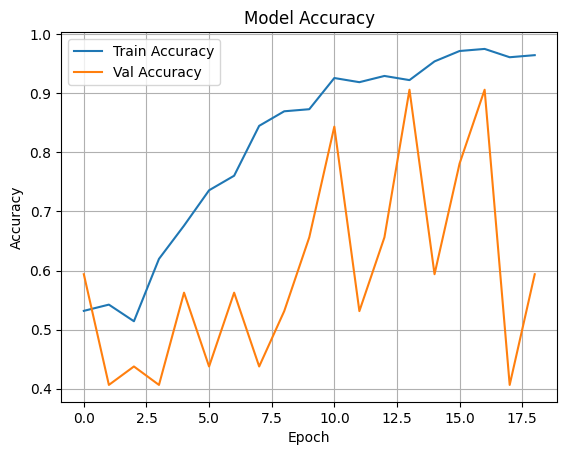

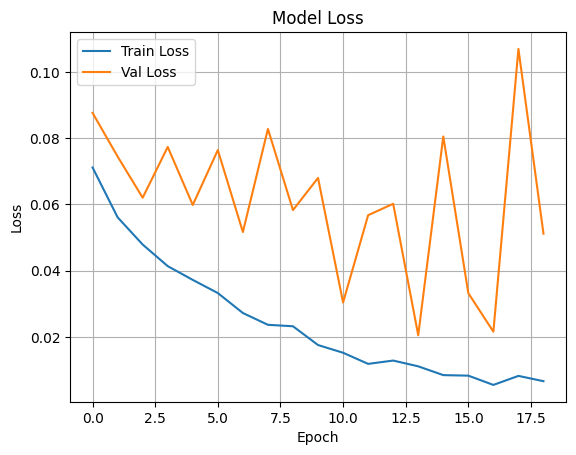

In [58]:

import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure()
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Loss
plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot AUC if available
if 'auc' in history.history:
    plt.figure()
    plt.plot(history.history['auc'], label='Train AUC')
    plt.plot(history.history['val_auc'], label='Val AUC')
    plt.title('Model AUC')
    plt.xlabel('Epoch')
    plt.ylabel('AUC')
    plt.legend()
    plt.grid(True)
    plt.show()

# Add MCC if logged manually during training (use a list to store each epoch's MCC and plot similarly)


Loaded 5 models.
Accuracy: 0.9753
Precision: 0.9792
Recall (Sensitivity): 0.9792
Specificity: 0.9697
F1 Score: 0.9792
AUC: 0.9981
MCC: 0.9489


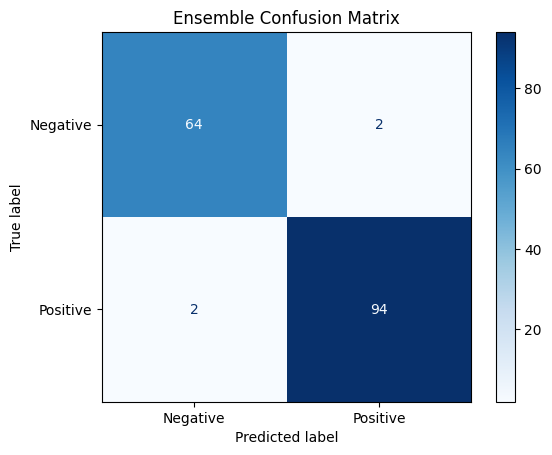

In [68]:
import numpy as np
import tensorflow as tf

# Load all 5 models from EfficientNetV2 folder
models = []
for i in range(5):
    model_path = f"efficientnet_models/fold{i+1}.h5"
    model = tf.keras.models.load_model(model_path, compile=False)
    models.append(model)
print(f"Loaded {len(models)} models.")

# Generate predictions from each model on the test generator
all_probs = []
for model in models:
    probs = model.predict(test_gen, verbose=0).ravel()
    all_probs.append(probs)

# Average predictions across all models
avg_prob = np.mean(all_probs, axis=0)


threshold = 0.35  #  change this accordingly (not sure about this)
final_pred = (avg_prob > threshold).astype(int)

# Evaluation
evaluate_model(y_true, final_pred, avg_prob)
